### Treść zadania

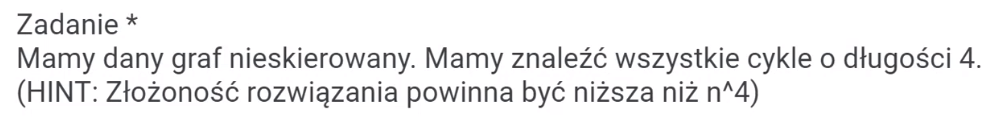

### Omówienie algorytmu

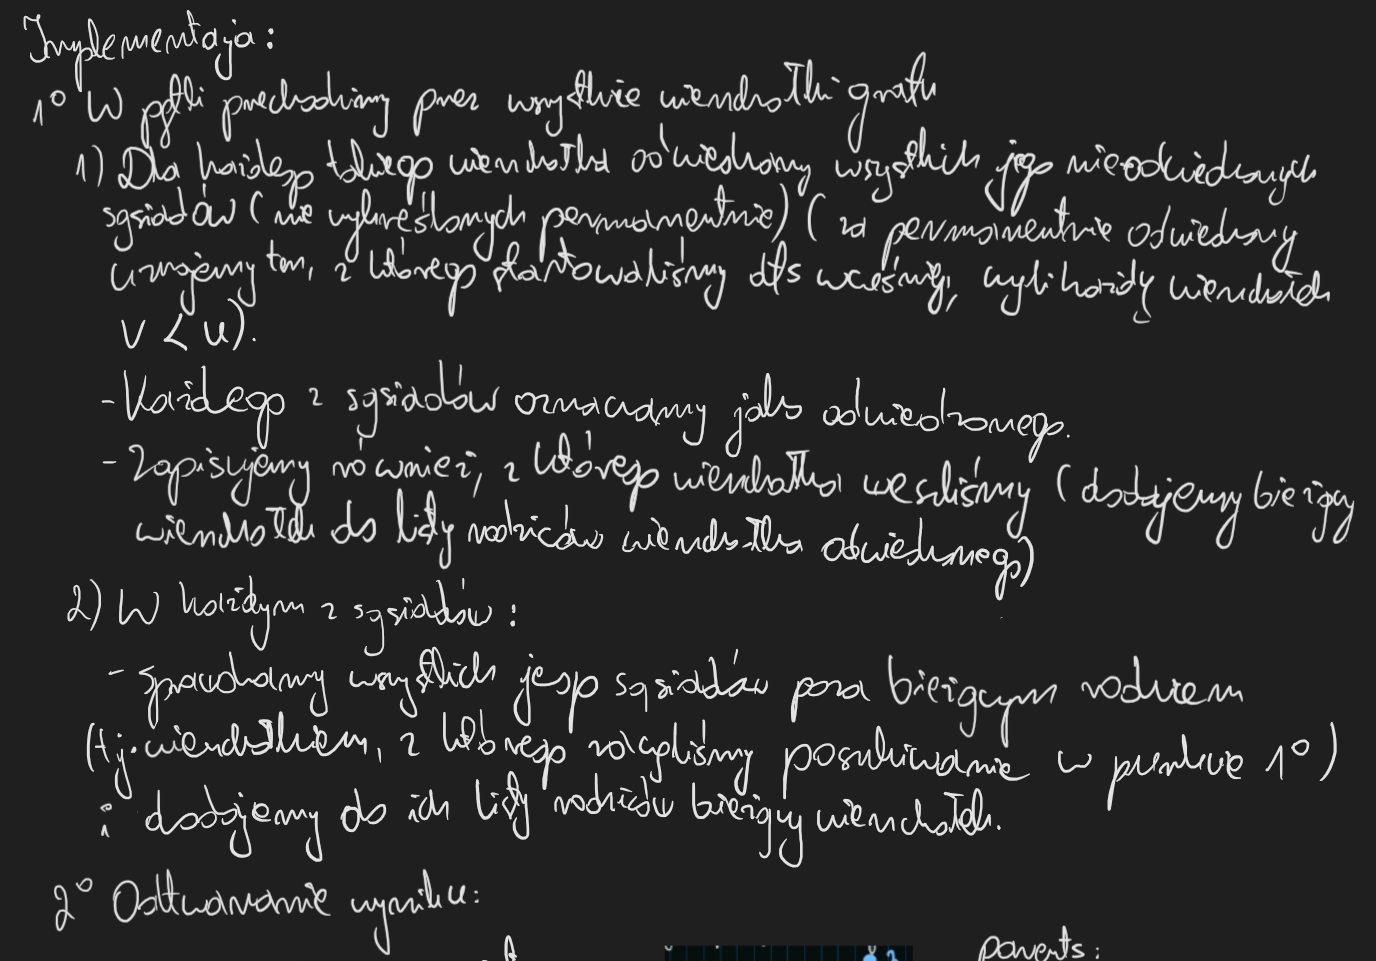
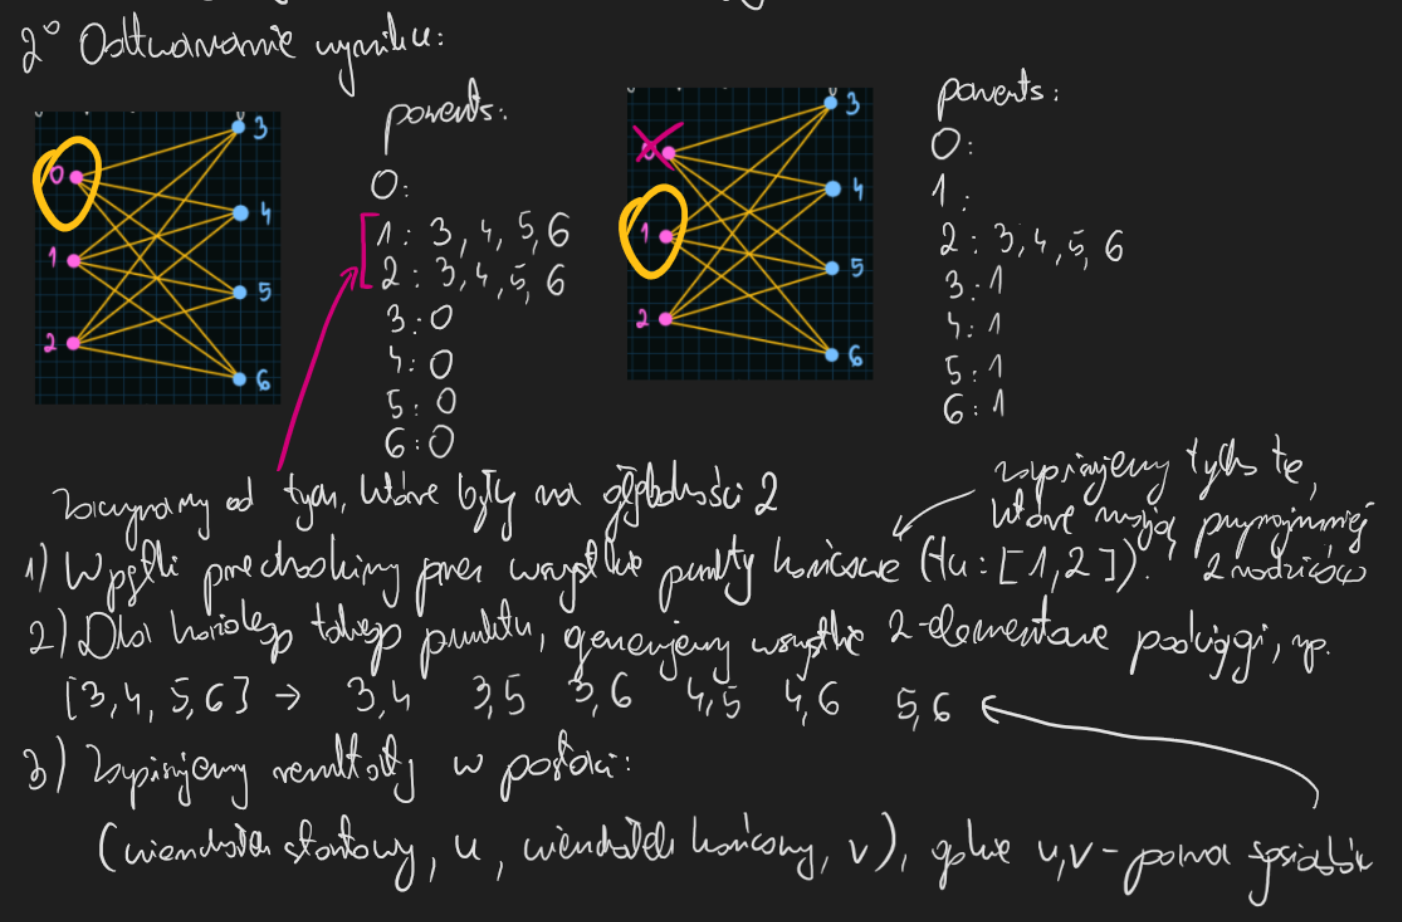

### Złożoność

###### Obliczeniowa:
$ O(V^3) $

### Implementacja #1
##### (Dla reprezentacji macierzowej)

In [1]:
def find_all_C4(G: 'graph represented using adjacency matrix'):
    n = len(G)
    parents = [[] for _ in range(n)]
    marked  = [False] * n
    endpoints = []
    cycles = []
    
    for u in range(n):
        # Loop over all the unvisited neighbours
        for v in range(n):
            # Skip if there is no edge or a vertex v was processed before
            if not G[u][v] or v <= u: continue
            parents[v].append(u)
            # Loop over all their unvisited neighbours
            for w in range(n):
                # Skip if there is no edge, a vertex w was processed before or we
                # have a cycle of the length 3
                if not G[v][w] or w <= u or (parents[w] and parents[w][0] == u): continue
                parents[w].append(v)
                # Mark as an endpoint if has more than 1 parent
                if len(parents[w]) > 1 and not marked[w]: 
                    endpoints.append(w)
                    marked[w] = True

        # Now, as we created an array of parents, we can restore all 
        # the cycles starting from the endpoints (if there is any)
        for w in endpoints:
            # Get all the pairs of u - v vertices neighbours
            for i in range(1, len(parents[w])):
                for j in range(i):
                    cycles.append((u, parents[w][j], w, parents[w][i]))
            
        # Reset values for the next loop
        for i in range(n): parents[i].clear()
        for v in endpoints: marked[v] = False
        endpoints.clear()
            
    return cycles


def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M

###### Kilka testów

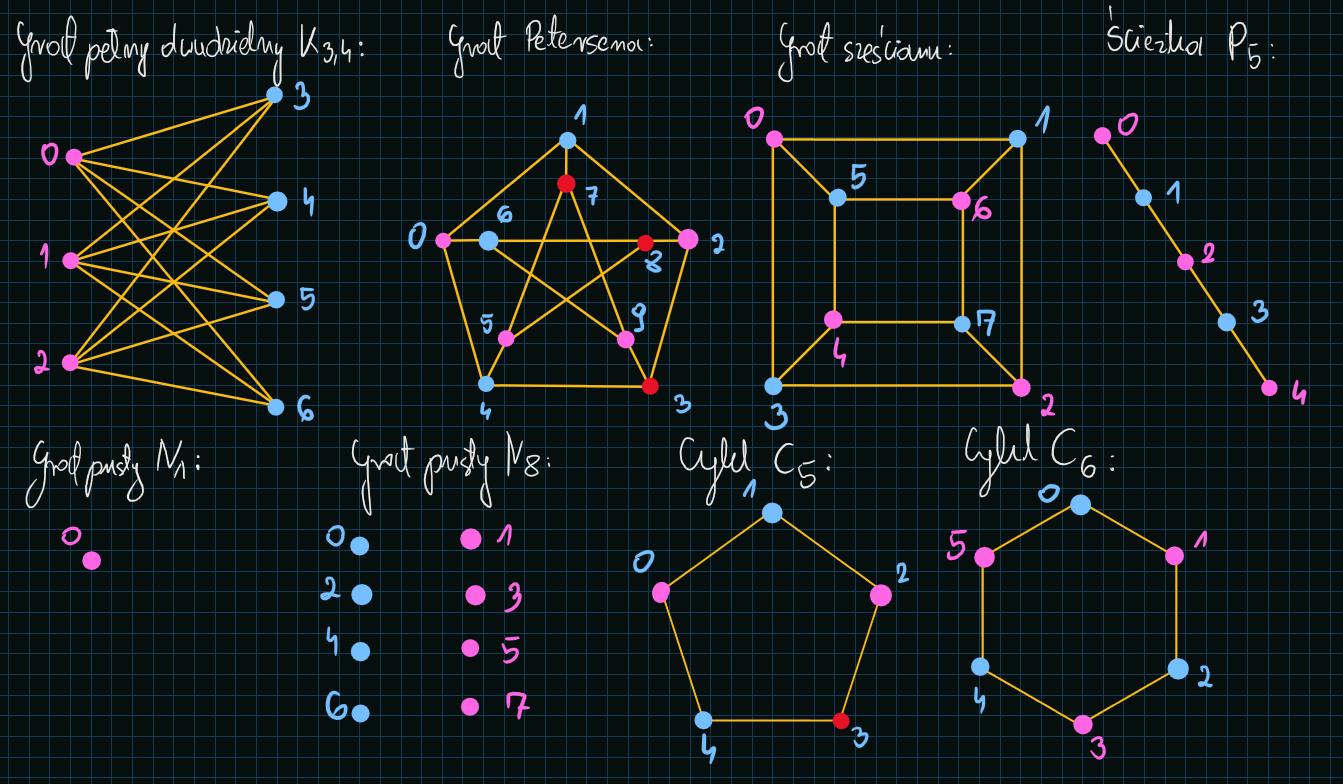

##### Pełny dwudzielny $ K_{3,4} $:

In [2]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_matrix(E, 7)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
All cycles of length 4:
(0, 3, 1, 4)
(0, 3, 1, 5)
(0, 4, 1, 5)
(0, 3, 1, 6)
(0, 4, 1, 6)
(0, 5, 1, 6)
(0, 3, 2, 4)
(0, 3, 2, 5)
(0, 4, 2, 5)
(0, 3, 2, 6)
(0, 4, 2, 6)
(0, 5, 2, 6)
(1, 3, 2, 4)
(1, 3, 2, 5)
(1, 4, 2, 5)
(1, 3, 2, 6)
(1, 4, 2, 6)
(1, 5, 2, 6)


##### Graf Petersena:

In [3]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
All cycles of length 4:


##### Graf sześcianu (kostka $ Q_3 $):

In [4]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_matrix(E, 8)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 0]
All cycles of length 4:
(0, 1, 2, 3)
(0, 3, 4, 5)
(0, 1, 6, 5)
(1, 2, 7, 6)
(2, 3, 4, 7)
(4, 5, 6, 7)


##### Ścieżka $ P_5 $:

In [5]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
All cycles of length 4:


##### Graf pusty $ N_1 $:

In [6]:
G = [[0]]  # No connections here (only one vertex)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0]
All cycles of length 4:


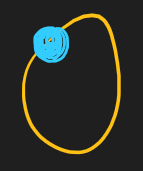

In [7]:
G = [[1]]

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1]
All cycles of length 4:


##### Graf pusty $ N_8 $:

In [8]:
G = [[0] * 8 for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
All cycles of length 4:


##### Cykl $ C_5 $:

In [9]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 1]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 0, 1, 0]
All cycles of length 4:


##### Cykl $ C_3 $:

In [10]:
E = [(i, (i + 1) % 3) for i in range(3)]
G = undirected_graph_matrix(E, 3)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 1]
[1, 0, 1]
[1, 1, 0]
All cycles of length 4:


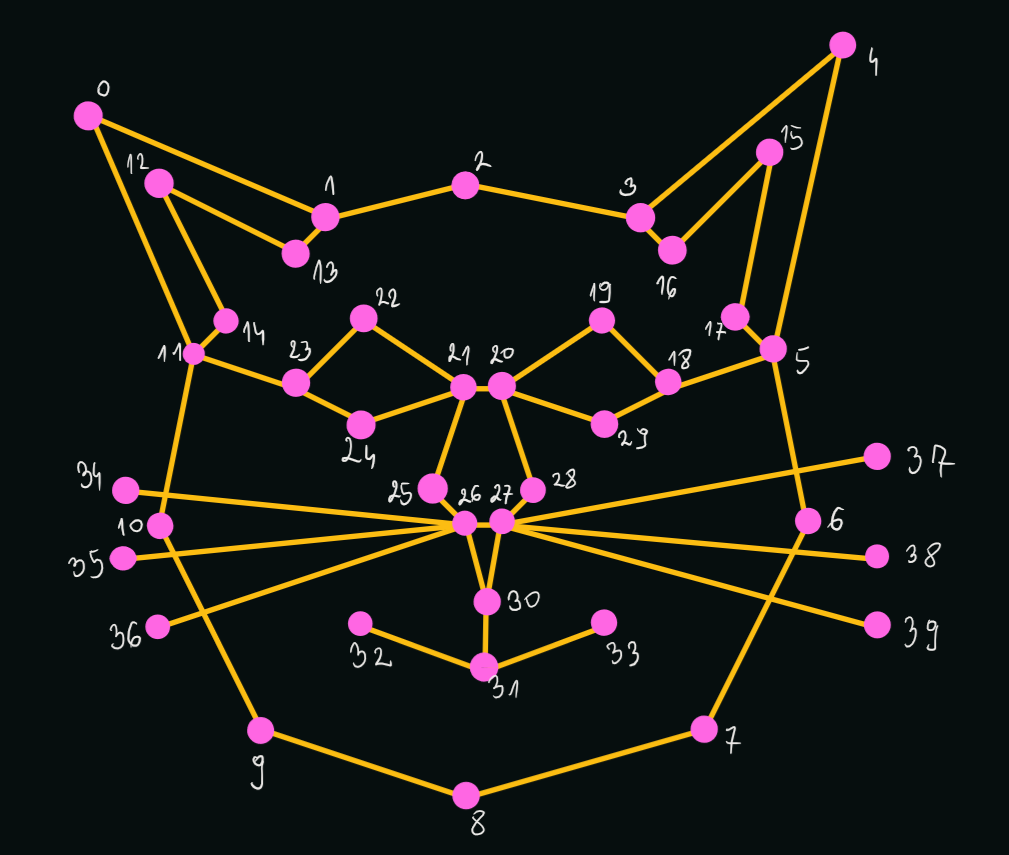

In [11]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))
G = undirected_graph_matrix(E, n)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0

### Implementacja #2
##### (Dla reprezentacji listowej)

In [12]:
def find_all_C4(G: 'graph represented using adjacency lists'):
    n = len(G)
    parents = [[] for _ in range(n)]
    marked  = [False] * n
    endpoints = []
    cycles = []
    
    for u in range(n):
        # Loop over all the unvisited neighbours
        for v in G[u]:
            # Skip if a vertex v was processed before
            if v <= u: continue
            parents[v].append(u)
            # Loop over all their unvisited neighbours
            for w in G[v]:
                # Skip if a vertex w was processed before or we
                # have a cycle of the length 3
                if w <= u or (parents[w] and parents[w][0] == u): continue
                parents[w].append(v)
                # Mark as an endpoint if has more than 1 parent
                if len(parents[w]) > 1 and not marked[w]: 
                    endpoints.append(w)
                    marked[w] = True

        # Now, as we created an array of parents, we can restore all 
        # the cycles starting from the endpoints (if there is any)
        for w in endpoints:
            # Get all the pairs of u - v vertices neighbours
            for i in range(1, len(parents[w])):
                for j in range(i):
                    cycles.append((u, parents[w][j], w, parents[w][i]))
            
        # Reset values for the next loop
        for i in range(n): parents[i].clear()
        for v in endpoints: marked[v] = False
        endpoints.clear()
            
    return cycles


def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

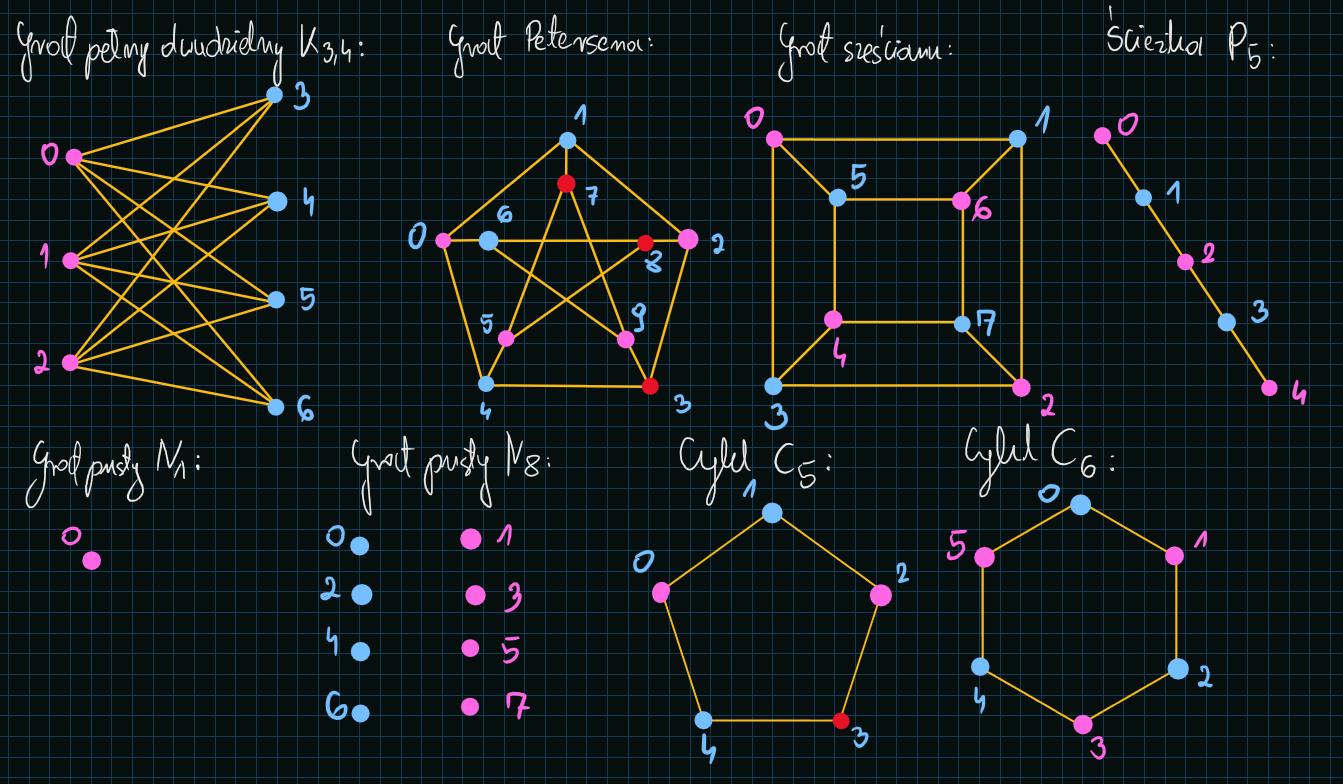

##### Pełny dwudzielny $ K_{3,4} $:

In [13]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_list(E, 7)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[3, 4, 5, 6]
[3, 4, 5, 6]
[3, 4, 5, 6]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
All cycles of length 4:
(0, 3, 1, 4)
(0, 3, 1, 5)
(0, 4, 1, 5)
(0, 3, 1, 6)
(0, 4, 1, 6)
(0, 5, 1, 6)
(0, 3, 2, 4)
(0, 3, 2, 5)
(0, 4, 2, 5)
(0, 3, 2, 6)
(0, 4, 2, 6)
(0, 5, 2, 6)
(1, 3, 2, 4)
(1, 3, 2, 5)
(1, 4, 2, 5)
(1, 3, 2, 6)
(1, 4, 2, 6)
(1, 5, 2, 6)


##### Graf Petersena:

In [14]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_list(E, 10)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1, 6, 4]
[0, 7, 2]
[1, 8, 3]
[2, 4, 9]
[0, 3, 5]
[4, 8, 7]
[0, 8, 9]
[1, 5, 9]
[2, 6, 5]
[3, 7, 6]
All cycles of length 4:


##### Graf sześcianu (kostka $ Q_3 $):

In [15]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_list(E, 8)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1, 3, 5]
[0, 2, 6]
[1, 3, 7]
[2, 0, 4]
[5, 7, 3]
[4, 6, 0]
[5, 7, 1]
[6, 4, 2]
All cycles of length 4:
(0, 1, 2, 3)
(0, 3, 4, 5)
(0, 1, 6, 5)
(1, 2, 7, 6)
(2, 3, 4, 7)
(4, 5, 6, 7)


##### Ścieżka $ P_5 $:

In [16]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1]
[0, 2]
[1, 3]
[2, 4]
[3]
All cycles of length 4:


##### Graf pusty $ N_1 $:

In [17]:
G = [[]]  # No connections here (only one vertex)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[]
All cycles of length 4:


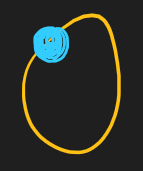

In [18]:
G = [[0]]

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0]
All cycles of length 4:


##### Graf pusty $ N_8 $:

In [19]:
G = [[] for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[]
[]
[]
[]
[]
[]
[]
[]
All cycles of length 4:


##### Cykl $ C_5 $:

In [20]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1, 4]
[0, 2]
[1, 3]
[2, 4]
[3, 0]
All cycles of length 4:


##### Cykl $ C_3 $:

In [21]:
E = [(i, (i + 1) % 3) for i in range(3)]
G = undirected_graph_list(E, 3)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1, 2]
[0, 2]
[1, 0]
All cycles of length 4:


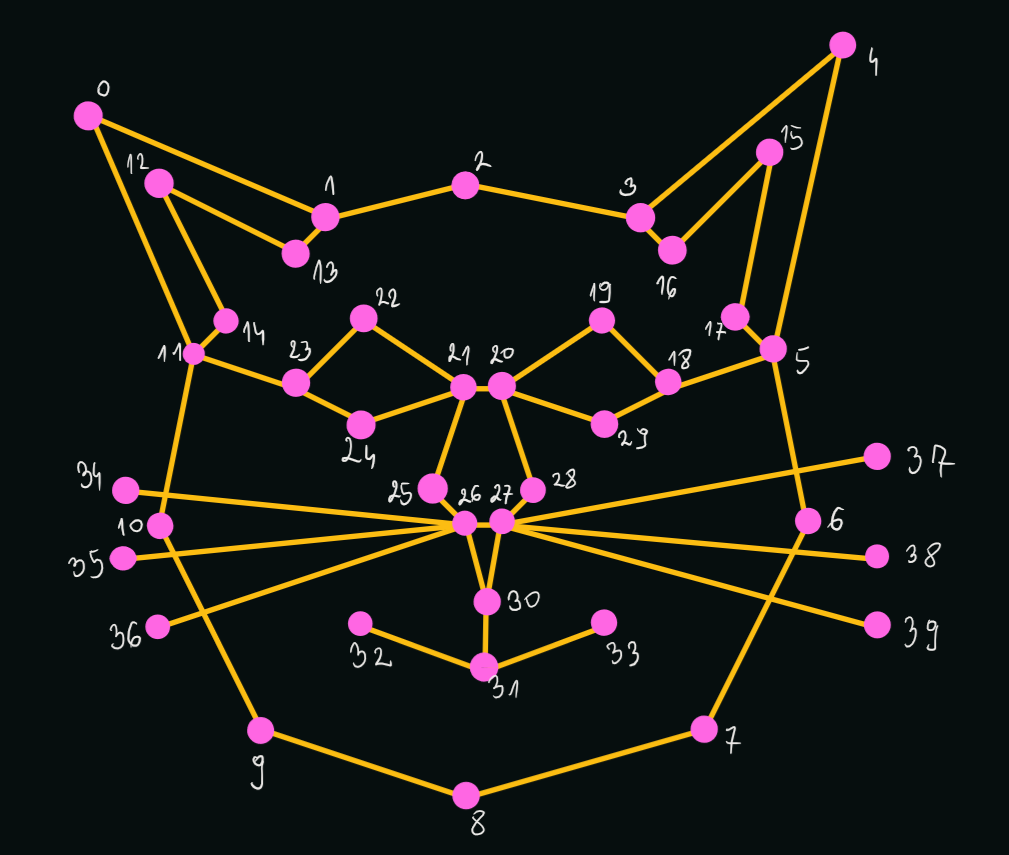

In [22]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))
G = undirected_graph_list(E, n)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1, 11]
[0, 2, 13]
[1, 3]
[2, 4, 16]
[3, 5]
[4, 6, 17, 18]
[5, 7]
[6, 8]
[7, 9]
[8, 10]
[9, 11]
[10, 0, 14, 23]
[14, 13]
[12, 1]
[11, 12]
[16, 17]
[3, 15]
[15, 5]
[19, 29, 5]
[20, 18]
[21, 19, 29, 28]
[22, 24, 20, 25]
[23, 21]
[11, 22, 24]
[21, 23]
[21, 26]
[25, 27, 30, 34, 35, 36]
[26, 28, 30, 37, 38, 39]
[27, 20]
[18, 20]
[26, 27, 31]
[30, 32, 33]
[31]
[31]
[26]
[26]
[26]
[27]
[27]
[27]
All cycles of length 4:
(18, 19, 20, 29)
(21, 22, 23, 24)
